# Example with test images automatically generated
This example is a simple transposition of the one provided with digHolo but using the pyDigHolo module.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyDigHolo import digHolo

In [13]:
# %pip install wurlitzer
# %load_ext wurlitzer

Note: you may need to restart the kernel to use updated packages.


## Path of digHolo ```.dll``` or ```.so```

In [3]:
dll_path = "/path/to/libdigholo.dll|so"
import os
dll_path = os.path.abspath("../digHolo/libdigholo.so")

## Load pyDigHolo module

In [4]:
dh = digHolo(dll_path)
# Redirect console to file
# dh.RedirectConsole('digholo.log')

In [34]:
#Number of camera frames
#frameCount = frameBuffer.shape[0]
frameCount = 45
batchCount = frameCount

#Width/height of camera frames
frameWidth = 320
frameHeight = 256
#frameWidth = frameBuffer.shape[2]
#frameHeight = frameBuffer.shape[1]

#Camera pixel size (microns)
pixelSize = 20e-6

#Centre wavelength (nanometres)
lambda0 = 1565e-9

#Polarisation components per frame
polCount = 2

#Width/height of window to FFT on the camera. (pixels)
nx = 128
ny = 128

#Amount of detail to print to console. 0: Console off. 1: Basic info. 2:Debug mode. 3: You've got serious issues
verbosity = 2

#Sets the resolution mode of the reconstructed field.
#0 : Full resolution. Reconstructed field will have same pixel
#size/dimensions as the FFT window.
#1 : Low resolution. Reconstructed field will have dimension of the IFFT
#window. 
resolutionMode = 1

#Specifies the number of HG mode groups to decompose the beams in.
#Total modes = sum(1:maxMG). maxMG=1->1 mode, maxMG=9->45 modes.
maxMG = 9

## Generate frames

In [35]:
frames = dh.FrameSimulatorCreateSimple( 
        frameCount, 
        frameWidth, 
        frameHeight, 
        pixelSize,
        lambda0, 
        polCount, 
        dataType = 'Python')

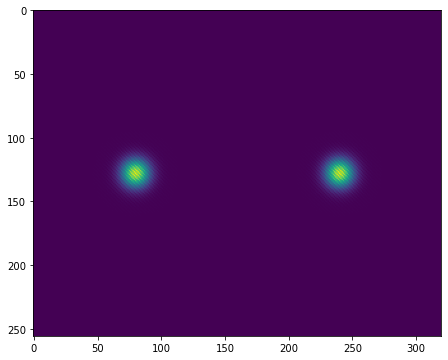

In [12]:
ind = 0

plt.figure(figsize=(14,6))
plt.imshow(frames[ind])

## Configure off-axis

In [13]:
dh.ConfigOffAxis(
    [frameWidth, frameHeight],
    [nx, ny],
    resolutionMode,  
    pixelSize,
    lambda0,
    maxMG,
    polCount
)

## Configure Auto-align

In [17]:
dh.ConfigSetAutoAlign(
    enable_align_beam_centre=True,
    enable_align_defocus=True,
    enable_align_tilt=True,
    enable_align_basis_waist=True,
    enable_align_fourier_win_radius=True,
)
# We choose here to fix the FFT window radius to a chosen value
dh.SetFourierWindowRadius(0.15)

## Perform auto-calibration and retrieve resulting fields

In [18]:
dh.SetBatch(frameCount, frames, dataType = 'Python')
dh.AutoAlign()
cpx_imgs = dh.GetFields()

45


## Show the calibration parameters

In [19]:
print(dh.GetFramePixelSize())
print(dh.GetWavelengthCentre())
print(dh.GetFourierWindowRadius())
print(dh.GetBeamCentre())
print(dh.GetDefocus())
print(dh.GetTilt())


1.9999999494757503e-05
1.565000047776266e-06
0.15043656527996063
[-0.0016737456899136305, 1.0164076229557395e-05]
0.0022395551204681396
[0.8231673240661621, 0.014314031228423119]


## Display the recovered complex fields

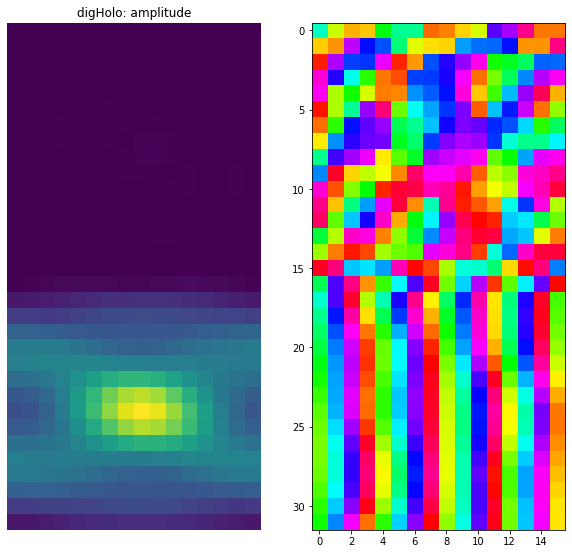

In [21]:
ind = 0

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(np.abs(cpx_imgs[ind]))
plt.axis('off')
plt.title('digHolo: amplitude')
plt.subplot(122)
plt.imshow(np.angle(cpx_imgs[ind]), cmap = 'hsv')

In [9]:
import ctypes
libc = ctypes.CDLL('libc.so.6')

# print('This text gets captured by myStdOut')
libc.printf('This text fails to be captured by myStdOut')

1

In [10]:
import os, sys, select

# the pipe would fail for some reason if I didn't write to stdout at some point
# so I write a space, then backspace (will show as empty in a normal terminal)
sys.stdout.write(' \b')
pipe_out, pipe_in = os.pipe()
# save a copy of stdout
stdout = os.dup(1)
# replace stdout with our write pipe
os.dup2(pipe_in, 1)

 

1

In [15]:
libc.printf('This text fails to be captured by myStdOut')


1

T

In [14]:
from wurlitzer import pipes, sys_pipes, STDOUT, PIPE
with pipes() as (stdout, stderr):
    libc.printf('This text fails to be captured by myStdOut')

In [12]:
!jupyter nbconvert --to python simulated_data.ipynb

[NbConvertApp] Converting notebook simulated_data.ipynb to python
[NbConvertApp] Writing 3941 bytes to simulated_data.py
